## Import Libraries 

In [1]:
import warnings
import sys
sys.path.insert(0, '../../src')
warnings.filterwarnings('ignore')

In [2]:
import ABC_train_test2
import friedman2Dataset
import network
import dataset
import sanityChecks
import torch 
import scrapbook as sb
from statistics import mean 
import catboost as ctb 
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error,mean_absolute_error
import numpy as np

## Parameters 

In [3]:
variance = 1

In [4]:
# Parameters
variance = 0.1


## Dataset 


In [5]:
#Parameters 
n_features = 4
n_samples= 100
n_target = 1 

In [6]:
X,Y = friedman2Dataset.friedman2_data(n_samples)

          X1           X2        X3         X4            Y
0  78.040938   766.779975  0.219874   7.652204   185.771502
1  31.434270  1429.279085  0.286081   6.704337   410.080709
2  69.120115   979.060579  0.237298  10.687942   242.327825
3  20.057644  1375.635839  0.452863   8.605141   623.372358
4   2.769078  1279.576559  0.831325   7.719556  1063.705969


In [7]:
#Train test split for dataset 
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size = 0.2)
train_data = dataset.CustomDataset(X_train,Y_train)
test_data = dataset.CustomDataset(X_test,Y_test)


## Training Parameters 

In [8]:
batch_size = 32
n_epochs = 1000
#Select the device 
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

# ABC Pre-generator Model 

1. The catboost model is used as a pre-generator model for the ABC-GAN. 
2. The model is first trained on the entire dataset 
3. It generats X,Y pairs and we add some Gaussian noise with mean 0 and variance 1 to it which is then feed as input to the generator.


In [9]:
#Train the Model 
prior_model = ctb.CatBoostRegressor()
prior_model.fit(X_train,Y_train)

Learning rate set to 0.024897
0:	learn: 1.0093092	total: 69.3ms	remaining: 1m 9s
1:	learn: 0.9972903	total: 69.8ms	remaining: 34.8s
2:	learn: 0.9871357	total: 70.3ms	remaining: 23.3s
3:	learn: 0.9753168	total: 71ms	remaining: 17.7s
4:	learn: 0.9637512	total: 71.5ms	remaining: 14.2s
5:	learn: 0.9523108	total: 72ms	remaining: 11.9s
6:	learn: 0.9379495	total: 72.4ms	remaining: 10.3s
7:	learn: 0.9253784	total: 72.9ms	remaining: 9.04s
8:	learn: 0.9122482	total: 73.5ms	remaining: 8.09s
9:	learn: 0.9002849	total: 74ms	remaining: 7.33s
10:	learn: 0.8879700	total: 74.6ms	remaining: 6.71s
11:	learn: 0.8759791	total: 75.1ms	remaining: 6.18s
12:	learn: 0.8644764	total: 75.5ms	remaining: 5.73s
13:	learn: 0.8531234	total: 75.9ms	remaining: 5.35s
14:	learn: 0.8426361	total: 76.4ms	remaining: 5.02s
15:	learn: 0.8331572	total: 76.9ms	remaining: 4.73s
16:	learn: 0.8231882	total: 77.3ms	remaining: 4.47s
17:	learn: 0.8139041	total: 77.8ms	remaining: 4.24s
18:	learn: 0.8052177	total: 78.1ms	remaining: 4.03

85:	learn: 0.3699242	total: 107ms	remaining: 1.14s
86:	learn: 0.3666507	total: 107ms	remaining: 1.13s
87:	learn: 0.3627017	total: 108ms	remaining: 1.12s
88:	learn: 0.3591850	total: 108ms	remaining: 1.11s
89:	learn: 0.3557049	total: 109ms	remaining: 1.1s
90:	learn: 0.3524362	total: 109ms	remaining: 1.09s
91:	learn: 0.3496212	total: 110ms	remaining: 1.08s
92:	learn: 0.3459599	total: 110ms	remaining: 1.07s
93:	learn: 0.3423771	total: 110ms	remaining: 1.06s
94:	learn: 0.3383926	total: 111ms	remaining: 1.05s
95:	learn: 0.3341418	total: 111ms	remaining: 1.04s
96:	learn: 0.3311860	total: 112ms	remaining: 1.04s
97:	learn: 0.3276313	total: 113ms	remaining: 1.04s
98:	learn: 0.3242040	total: 113ms	remaining: 1.03s
99:	learn: 0.3199943	total: 113ms	remaining: 1.02s
100:	learn: 0.3156939	total: 114ms	remaining: 1.01s
101:	learn: 0.3124669	total: 114ms	remaining: 1s
102:	learn: 0.3092320	total: 115ms	remaining: 998ms
103:	learn: 0.3059808	total: 115ms	remaining: 991ms
104:	learn: 0.3032117	total: 11

266:	learn: 0.0727160	total: 187ms	remaining: 512ms
267:	learn: 0.0722051	total: 187ms	remaining: 511ms
268:	learn: 0.0716747	total: 187ms	remaining: 509ms
269:	learn: 0.0712664	total: 188ms	remaining: 507ms
270:	learn: 0.0706948	total: 188ms	remaining: 506ms
271:	learn: 0.0702046	total: 188ms	remaining: 504ms
272:	learn: 0.0697511	total: 189ms	remaining: 503ms
273:	learn: 0.0691632	total: 189ms	remaining: 501ms
274:	learn: 0.0687610	total: 190ms	remaining: 500ms
275:	learn: 0.0683200	total: 190ms	remaining: 499ms
276:	learn: 0.0678351	total: 190ms	remaining: 497ms
277:	learn: 0.0674253	total: 191ms	remaining: 496ms
278:	learn: 0.0670175	total: 192ms	remaining: 495ms
279:	learn: 0.0666559	total: 192ms	remaining: 493ms
280:	learn: 0.0663145	total: 192ms	remaining: 492ms
281:	learn: 0.0658821	total: 193ms	remaining: 491ms
282:	learn: 0.0654305	total: 193ms	remaining: 489ms
283:	learn: 0.0649774	total: 193ms	remaining: 488ms
284:	learn: 0.0645773	total: 194ms	remaining: 487ms
285:	learn: 

498:	learn: 0.0267371	total: 289ms	remaining: 290ms
499:	learn: 0.0266616	total: 290ms	remaining: 290ms
500:	learn: 0.0266242	total: 290ms	remaining: 289ms
501:	learn: 0.0265621	total: 291ms	remaining: 288ms
502:	learn: 0.0264987	total: 291ms	remaining: 288ms
503:	learn: 0.0264621	total: 291ms	remaining: 287ms
504:	learn: 0.0264139	total: 292ms	remaining: 286ms
505:	learn: 0.0262596	total: 292ms	remaining: 285ms
506:	learn: 0.0262005	total: 293ms	remaining: 285ms
507:	learn: 0.0261297	total: 293ms	remaining: 284ms
508:	learn: 0.0260944	total: 293ms	remaining: 283ms
509:	learn: 0.0260483	total: 294ms	remaining: 282ms
510:	learn: 0.0260138	total: 294ms	remaining: 282ms
511:	learn: 0.0259570	total: 295ms	remaining: 281ms
512:	learn: 0.0259123	total: 295ms	remaining: 280ms
513:	learn: 0.0257636	total: 296ms	remaining: 279ms
514:	learn: 0.0257064	total: 296ms	remaining: 279ms
515:	learn: 0.0256837	total: 297ms	remaining: 278ms
516:	learn: 0.0256156	total: 297ms	remaining: 277ms
517:	learn: 

681:	learn: 0.0147922	total: 369ms	remaining: 172ms
682:	learn: 0.0147423	total: 370ms	remaining: 172ms
683:	learn: 0.0146984	total: 370ms	remaining: 171ms
684:	learn: 0.0146561	total: 371ms	remaining: 170ms
685:	learn: 0.0145792	total: 371ms	remaining: 170ms
686:	learn: 0.0145361	total: 372ms	remaining: 169ms
687:	learn: 0.0144556	total: 372ms	remaining: 169ms
688:	learn: 0.0144022	total: 372ms	remaining: 168ms
689:	learn: 0.0143225	total: 373ms	remaining: 167ms
690:	learn: 0.0142786	total: 373ms	remaining: 167ms
691:	learn: 0.0142015	total: 373ms	remaining: 166ms
692:	learn: 0.0141587	total: 374ms	remaining: 166ms
693:	learn: 0.0141381	total: 374ms	remaining: 165ms
694:	learn: 0.0140981	total: 375ms	remaining: 164ms
695:	learn: 0.0140782	total: 375ms	remaining: 164ms
696:	learn: 0.0140327	total: 376ms	remaining: 163ms
697:	learn: 0.0140133	total: 376ms	remaining: 163ms
698:	learn: 0.0139754	total: 377ms	remaining: 162ms
699:	learn: 0.0138996	total: 377ms	remaining: 162ms
700:	learn: 

909:	learn: 0.0069653	total: 472ms	remaining: 46.7ms
910:	learn: 0.0069453	total: 473ms	remaining: 46.2ms
911:	learn: 0.0069219	total: 473ms	remaining: 45.6ms
912:	learn: 0.0068837	total: 473ms	remaining: 45.1ms
913:	learn: 0.0068551	total: 474ms	remaining: 44.6ms
914:	learn: 0.0068386	total: 474ms	remaining: 44ms
915:	learn: 0.0068230	total: 475ms	remaining: 43.5ms
916:	learn: 0.0068036	total: 475ms	remaining: 43ms
917:	learn: 0.0067831	total: 475ms	remaining: 42.5ms
918:	learn: 0.0067768	total: 476ms	remaining: 41.9ms
919:	learn: 0.0067575	total: 476ms	remaining: 41.4ms
920:	learn: 0.0067206	total: 477ms	remaining: 40.9ms
921:	learn: 0.0066932	total: 477ms	remaining: 40.4ms
922:	learn: 0.0066774	total: 478ms	remaining: 39.8ms
923:	learn: 0.0066587	total: 478ms	remaining: 39.3ms
924:	learn: 0.0066385	total: 478ms	remaining: 38.8ms
925:	learn: 0.0066119	total: 479ms	remaining: 38.3ms
926:	learn: 0.0065764	total: 479ms	remaining: 37.7ms
927:	learn: 0.0065510	total: 480ms	remaining: 37.2

In [10]:
y_pred = prior_model.predict(X_test)
y_abc = y_pred + np.random.normal(0,variance, y_pred.shape)
mse = mean_squared_error(y_pred,Y_test)
sb.glue("Prior Model MSE",mse)
mse = mean_squared_error(y_abc,Y_test)
sb.glue("ABC Pre-generator MSE",mse)

mae = mean_absolute_error(y_pred,Y_test)
sb.glue("Prior Model MAE",mae)
mae = mean_absolute_error(y_abc,Y_test)
sb.glue("ABC Pre-generator MAE",mae)

# ABC GAN Model

In [11]:
gen = network.Generator(n_features+1).to(device)
disc = network.Discriminator(n_features+1).to(device)

criterion = torch.nn.BCELoss()
gen_opt = torch.optim.Adam(gen.parameters(), lr=0.001, betas=(0.5, 0.999))
disc_opt = torch.optim.Adam(disc.parameters(), lr=0.001, betas=(0.5, 0.999))

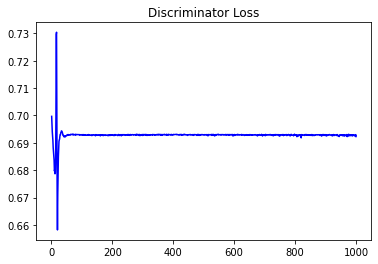

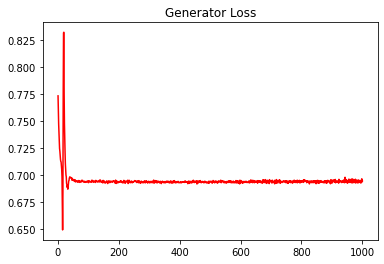

In [12]:
#Training the ABC_GAN 
ABC_train_test2.training_GAN(disc,gen,disc_opt,gen_opt,train_data,batch_size,n_epochs,criterion,prior_model,variance,0,device)

In [13]:
ABC_GAN1_metrics=ABC_train_test2.test_generator(gen,test_data,prior_model,variance,0,"1",device)
sb.glue("ABC_GAN_1 Metrics",ABC_GAN1_metrics)

print("MSE")
print(mean(ABC_GAN1_metrics[0]))

MSE
0.012794431801516465


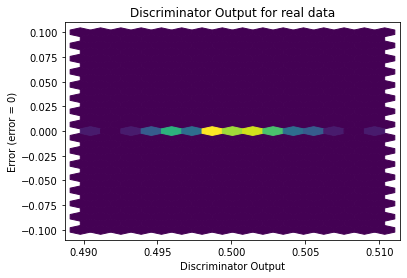

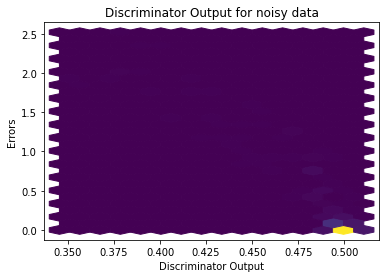

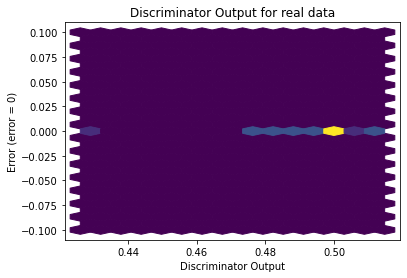

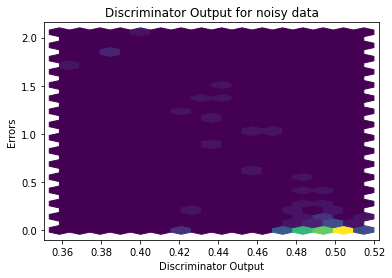

In [14]:
sanityChecks.discProbVsError(train_data,disc,device)
sanityChecks.discProbVsError(test_data,disc,device)

# ABC - GAN Model with skip connection

In [15]:
#Generator
gen3 = network.GeneratorWithSkipConnection(n_features+1).to(device)
constraints=network.weightConstraint()
#Discriminator 
disc3 = network.Discriminator(n_features+1).to(device)

criterion = torch.nn.BCELoss()
gen_opt = torch.optim.Adam(gen3.parameters(), lr=0.001, betas=(0.5, 0.999))
disc_opt = torch.optim.Adam(disc3.parameters(), lr=0.001, betas=(0.5, 0.999))


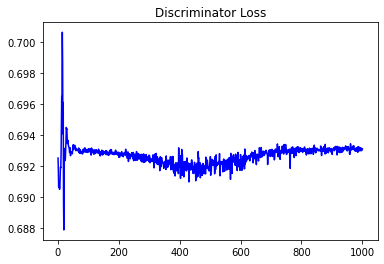

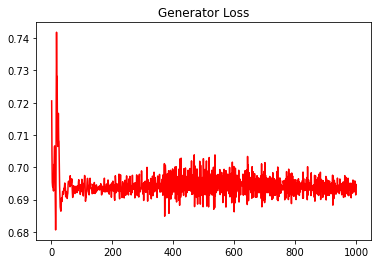

In [16]:
ABC_train_test2.training_GAN_skip_connection(disc3,gen3,disc_opt,gen_opt,train_data,batch_size,n_epochs,criterion,prior_model,variance,0,device)

In [17]:
ABC_GAN3_metrics=ABC_train_test2.test_generator(gen3,test_data,prior_model,variance,0,"3",device)
sb.glue("ABC_GAN_3 Metrics",ABC_GAN3_metrics)

print("MSE")
print(mean(ABC_GAN3_metrics[0]))

MSE
0.010052133011386752


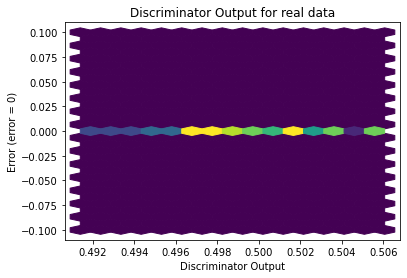

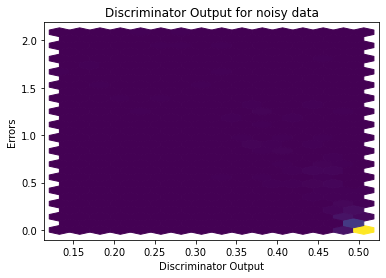

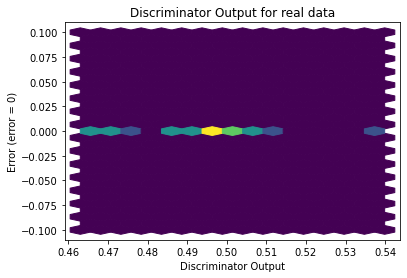

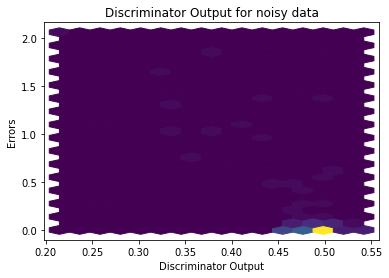

In [18]:
sanityChecks.discProbVsError(train_data,disc3,device)
sanityChecks.discProbVsError(test_data,disc3,device)

## Skip Connection Model Analysis - ABC-GAN 

### Weight Analysis 

Study the weights of the skip connection layer

Equation of the skip connection is 

$output = y_{gan} * w + y_{abc} * (1-w)$

In [19]:
print("Weight of the node at skip connection")
for name,param in gen3.named_parameters():
    if(name == "skipNode.weight"):
        print(param)
        sb.glue("Skip Connection Weight",param.item())

Weight of the node at skip connection
Parameter containing:
tensor([[0.2472]], requires_grad=True)
